# Course: Introduction To GenAI

*Notebook: Implementing_VAEs.ipynb*

<a href="https://colab.research.google.com/github/gassaf2/IntroductionToGenAI/blob/main/week2/Implementing_a_Simple_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 2 Hands-on Lab: Implementing and Exploring a Basic GAN**

**Introduction:** This exercise you understand the adversarial training mechanism of GANs by implementing a simple GAN using TensorFlow. You will learn how the generator and discriminator interact, visualize the outputs at different training stages, and evaluate the results.

**Step 1: Setup Your Environment**

Import the needed libraries.




In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt


**Step 2: Prepare the Dataset**

Use the MNIST dataset of handwritten digits.

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data to the range [0, 1]
x_train = x_train / 255.0

# Flatten the images
#x_train = x_train.reshape(x_train.shape[0], -1)


**Step 3: Build the Generator**

The generator takes random noise as input and outputs a fake image.


In [3]:
def build_generator():
    model = Sequential([
        Dense(128, activation='relu', input_dim=100),
        Dense(784, activation='sigmoid'),
        Reshape((28, 28))
    ])
    return model

generator = build_generator()


**Step 4: Build the Discriminator**

The discriminator evaluates whether an image is real or fake.


In [4]:
def build_discriminator():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

discriminator = build_discriminator()
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


**Step 5: Combine the Models for GAN Training**

Combine the generator and discriminator into a GAN.


In [5]:
def build_gan(generator, discriminator):
    discriminator.trainable = False  # Freeze discriminator during generator training
    model = Sequential([generator, discriminator])
    model.compile(optimizer='adam', loss='binary_crossentropy')
    return model

gan = build_gan(generator, discriminator)


**Step 6: Train the GAN**

Train the generator and discriminator in an adversarial setup.


In [6]:
def train_gan(generator, discriminator, gan, data, epochs=1000, batch_size=32):
    half_batch = batch_size // 2

    for epoch in range(epochs):
        # Train discriminator
        idx = np.random.randint(0, data.shape[0], half_batch)
        real_images = data[idx]
        fake_images = generator.predict(np.random.normal(0, 1, (half_batch, 100)))

        real_labels = np.ones((half_batch, 1))
        fake_labels = np.zeros((half_batch, 1))

        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        print(d_loss)

        # Train generator
        noise = np.random.normal(0, 1, (batch_size, 100))
        valid_labels = np.ones((batch_size, 1))  # Fool discriminator
        g_loss = gan.train_on_batch(noise, valid_labels)

        # Print losses every 100 epochs
        if epoch % 100 == 0:
            print(f"{epoch} [D loss: {d_loss[0]}] [G loss: {g_loss}]")


**Step 7: Visualize Generated Images**

Generate and visualize images from the trained generator.


1/1 [==============================] - 4s 4s/step
[1.62875974 0.28125   ]
0 [D loss: 1.628759741783142] [G loss: 0.3889811336994171]
1/1 [==============================] - 0s 44ms/step
[0.55100316 0.8125    ]
1/1 [==============================] - 0s 62ms/step
[0.31934542 0.9375    ]
1/1 [==============================] - 0s 61ms/step
[0.27737281 0.9375    ]
1/1 [==============================] - 0s 64ms/step
[0.28877824 0.96875   ]
1/1 [==============================] - 0s 58ms/step
[0.23597198 1.        ]
1/1 [==============================] - 0s 58ms/step
[0.19264416 1.        ]
1/1 [==============================] - 0s 62ms/step
[0.14172323 1.        ]
1/1 [==============================] - 0s 48ms/step
[0.13561551 1.        ]
1/1 [==============================] - 0s 56ms/step
[0.11534168 1.        ]
1/1 [==============================] - 0s 48ms/step
[0.07813403 1.        ]
1/1 [==============================] - 0s 48ms/step
[0.07343943 1.        ]
1/1 [==========================

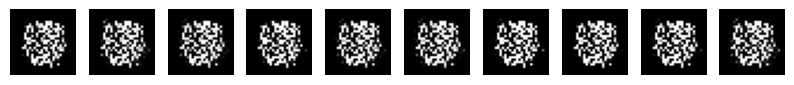

In [7]:

def generate_and_plot_images(generator, examples=10):
    noise = np.random.normal(0, 1, (examples, 100))
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(examples, 28, 28)

    plt.figure(figsize=(10, 2))
    for i in range(examples):
        plt.subplot(1, examples, i + 1)
        plt.imshow(generated_images[i], cmap='gray')
        plt.axis('off')
    plt.show()

# Generate and plot images after training
train_gan(generator, discriminator, gan, x_train, epochs=1000)
generate_and_plot_images(generator)


1/1 [==============================] - 0s 47ms/step


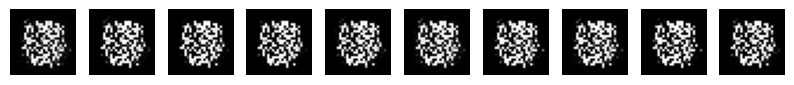

In [8]:
generate_and_plot_images(generator)